#버전
###### 8.1 구글 코랩에 DB 연결
###### 8.2 DB 데이터로 머신 러닝
###### 8.3 그래프 출력 여부 확인
###### 8.4 DB 머신러닝 지표로 날짜 변환하여 추가

In [66]:
import numpy as np
import pandas as pd

In [67]:
# 개선점
###### 구글 코랩 세션 유지 javascript 코드 추가 (1분마다 자동 재연결) https://naenjun.tistory.com/18
###### 코랩에 mysql 연결

!pip install PyMySQL

import pymysql

In [68]:
from requests import get
# pip install requests

ip = get("https://api.ipify.org").text
print("My public IP address : ", ip)

juso_db = pymysql.connect(
    user='kym', 
    passwd='kim', 
    host='13.209.100.19', 
    db='test', 
    charset='utf8'
)

My public IP address :  34.90.247.85


In [69]:
# SQL문 실행
# Connection 으로부터 Cursor 생성
curs = juso_db.cursor(pymysql.cursors.DictCursor)

sql = "SELECT elec.electric, prod.id, prod.name, prod.location, DATE_FORMAT(TRUNCATE(elec.datetime, -2), '%Y.%m.%d %H:%i:%s') datetime, env.temp, env.humid FROM elec_stat elec INNER JOIN env env ON DATE_FORMAT(TRUNCATE(elec.datetime, -2), '%Y.%m.%d %H:%i:%s') = DATE_FORMAT(TRUNCATE(env.datetime, -2), '%Y.%m.%d %H:%i:%s') INNER JOIN product prod ON elec.prod_id = prod.id"
curs.execute(sql)
 
# 데이타 Fetch
rows = curs.fetchall()
print(rows)     # 전체 rows

[{'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 16:55:00', 'temp': 24, 'humid': 37}, {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:05:00', 'temp': 24, 'humid': 37}, {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:15:00', 'temp': 24, 'humid': 37}, {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:25:00', 'temp': 24, 'humid': 37}, {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:35:00', 'temp': 24, 'humid': 38}, {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:45:00', 'temp': 24, 'humid': 38}, {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:55:00', 'temp': 24, 'humid': 38}, {'electric': 0.156916, 'id': 111, 'name'

In [70]:
r_data = np.array(rows)
r_data

array([{'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 16:55:00', 'temp': 24, 'humid': 37},
       {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:05:00', 'temp': 24, 'humid': 37},
       {'electric': 0.156916, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.01.22 17:15:00', 'temp': 24, 'humid': 37},
       ...,
       {'electric': 0.052305, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.02.03 14:50:00', 'temp': 24, 'humid': 15},
       {'electric': 0.052305, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.02.03 15:15:00', 'temp': 24, 'humid': 16},
       {'electric': 0.052305, 'id': 111, 'name': 'Monitor', 'location': 'DH_HOME', 'datetime': '2021.02.03 15:35:00', 'temp': 24, 'humid': 17}],
      dtype=object)

In [71]:
df = pd.DataFrame(rows)
df

,electric,id,name,location,datetime,temp,humid
0,0.156916,111,Monitor,DH_HOME,2021.01.22 16:55:00,24,37
1,0.156916,111,Monitor,DH_HOME,2021.01.22 17:05:00,24,37
2,0.156916,111,Monitor,DH_HOME,2021.01.22 17:15:00,24,37
3,0.156916,111,Monitor,DH_HOME,2021.01.22 17:25:00,24,37
4,0.156916,111,Monitor,DH_HOME,2021.01.22 17:35:00,24,38
...,...,...,...,...,...,...,...
2550,0.052305,111,Monitor,DH_HOME,2021.02.03 14:30:00,24,14
2551,0.052305,111,Monitor,DH_HOME,2021.02.03 14:40:00,24,15
2552,0.052305,111,Monitor,DH_HOME,2021.02.03 14:50:00,24,15
2553,0.052305,111,Monitor,DH_HOME,2021.02.03 15:15:00,24,16


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   electric  2555 non-null   float64
 1   id        2555 non-null   int64  
 2   name      2555 non-null   object 
 3   location  2555 non-null   object 
 4   datetime  2555 non-null   object 
 5   temp      2555 non-null   int64  
 6   humid     2555 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 139.9+ KB


In [73]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   electric  2555 non-null   float64       
 1   id        2555 non-null   int64         
 2   name      2555 non-null   object        
 3   location  2555 non-null   object        
 4   datetime  2555 non-null   datetime64[ns]
 5   temp      2555 non-null   int64         
 6   humid     2555 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 139.9+ KB


In [75]:
df_minute=df['datetime'].apply(lambda 날짜: 날짜.minute)
df_hour=df['datetime'].apply(lambda 날짜: 날짜.hour)

In [76]:
df['time_hour']=df_hour
df['time_minute']= df_minute

In [77]:
df

,electric,id,name,location,datetime,temp,humid,time_hour,time_minute
0,0.156916,111,Monitor,DH_HOME,2021-01-22 16:55:00,24,37,16,55
1,0.156916,111,Monitor,DH_HOME,2021-01-22 17:05:00,24,37,17,5
2,0.156916,111,Monitor,DH_HOME,2021-01-22 17:15:00,24,37,17,15
3,0.156916,111,Monitor,DH_HOME,2021-01-22 17:25:00,24,37,17,25
4,0.156916,111,Monitor,DH_HOME,2021-01-22 17:35:00,24,38,17,35
...,...,...,...,...,...,...,...,...,...
2550,0.052305,111,Monitor,DH_HOME,2021-02-03 14:30:00,24,14,14,30
2551,0.052305,111,Monitor,DH_HOME,2021-02-03 14:40:00,24,15,14,40
2552,0.052305,111,Monitor,DH_HOME,2021-02-03 14:50:00,24,15,14,50
2553,0.052305,111,Monitor,DH_HOME,2021-02-03 15:15:00,24,16,15,15


In [78]:
dataTestY = df.values[:,0]
dataTestY01 = dataTestY.astype(float)
dataTestY01

array([0.156916, 0.156916, 0.156916, ..., 0.052305, 0.052305, 0.052305])

In [79]:
userPeakValue = 0.1
testY = dataTestY01//userPeakValue
testY[:30]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [80]:
dataTestX= df[['id', 'temp', 'humid', 'time_hour', 'time_minute']]
testX = dataTestX.values
dataTestX01 = testX.astype(float)
testX[:15]

array([[111,  24,  37,  16,  55],
       [111,  24,  37,  17,   5],
       [111,  24,  37,  17,  15],
       [111,  24,  37,  17,  25],
       [111,  24,  38,  17,  35],
       [111,  24,  38,  17,  45],
       [111,  24,  38,  17,  55],
       [111,  24,  37,  18,   5],
       [111,  24,  37,  18,  15],
       [111,  24,  38,  18,  25],
       [111,  24,  37,  18,  35],
       [111,  24,  37,  18,  45],
       [111,  24,  37,  18,  55],
       [111,  24,  37,  19,   5],
       [111,  24,  37,  19,  15]])

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
def 모델평가(model, X, y, **설정):
    X_train, X_test, y_train, y_test = train_test_split(X, y, **설정)
    model.fit(X_train, y_train)
    훈련점수 = model.score(X_train, y_train)
    시험점수 = model.score(X_test, y_test)
    return 훈련점수, 시험점수

In [84]:
energe_forest = RandomForestClassifier(n_estimators=100)
모델평가(energe_forest, testX, testY)

(0.9932150313152401, 0.94679186228482)

## ------------------------------------ 전력 분포 확인용 ------------------------------------

In [85]:
from requests import get
# pip install requests

ip = get("https://api.ipify.org").text
print("My public IP address : ", ip)

juso_db = pymysql.connect(
    user='kym', 
    passwd='kim', 
    host='13.209.100.19', 
    db='test', 
    charset='utf8'
)

My public IP address :  34.90.247.85


In [86]:
# SQL문 실행
# Connection 으로부터 Cursor 생성
curs = juso_db.cursor(pymysql.cursors.DictCursor)

sql = "SELECT electric FROM elec_stat"
curs.execute(sql)
 
# 데이타 Fetch
rows = curs.fetchall()
print(rows)     # 전체 rows

[{'electric': 0.078458}, {'electric': 26.7803}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.156916}, {'electric': 0.052305}, {'electric': 0.052305}, {'electric': 0.052305}, {'electric': 0.052305}, {'electric': 0.052305}, {'electric': 0.052305}, {'electric': 0.156916}, {'electric': 0.1

In [87]:
df = pd.DataFrame(rows)
df['electric'].unique()# 10개?

array([7.84580e-02, 2.67803e+01, 1.56916e-01, 5.23050e-02, 1.30763e-01,
       2.61530e-02, 2.87679e-01, 2.61526e-01, 2.09221e-01, 1.83068e-01])

In [88]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f310e777710>,
  ...],
 <a list of 2572 Text major ticklabel objects>)

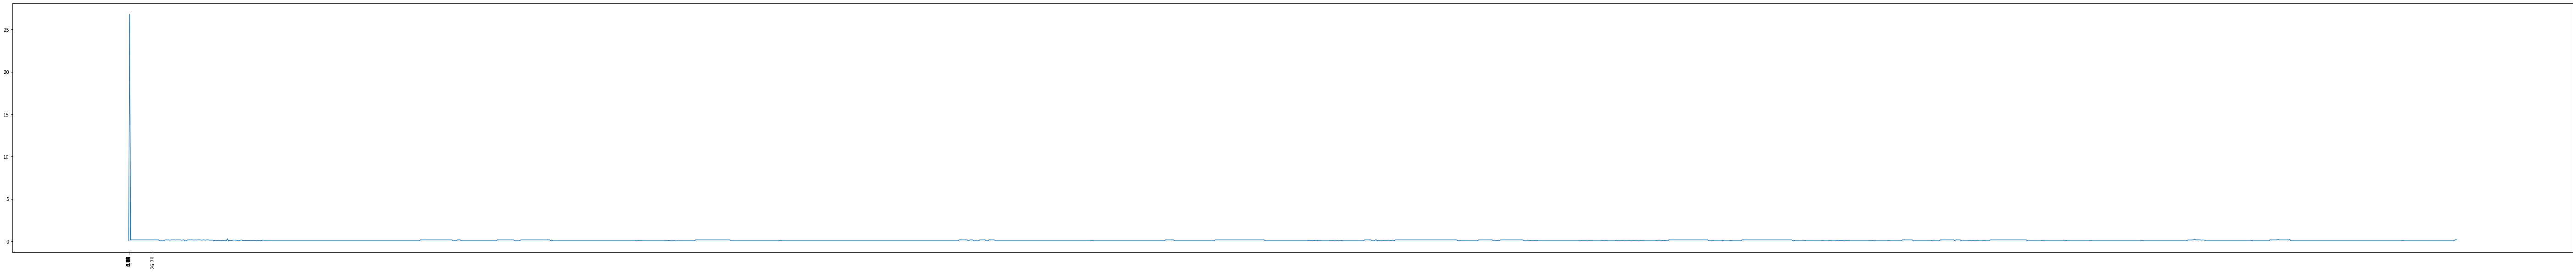

In [89]:
fig = plt.figure(figsize=(100,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(df['electric']) ## 선그래프 생성

plt.xticks(df['electric'], rotation=90) # when X tick labels are long

In [90]:
# Connection 닫기
juso_db.close()